In [59]:
# from torchvision.utils import make_grid
# from torchvision.utils import save_image
from IPython.display import Image
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np
from numpy import asarray
import random
from PIL import Image
import cv2 as cv
import math
import torch
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from PIL import Image as im
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import os
# %config InlineBackend.figure_format = ‘retina’

import helper


In [60]:
# store = []

# image_types = ['centerlight','glass','happy','leftside','normal','rightside','sad','sleepy','surprise']
# labels = []
# for j in label_vals:
#     for i in image_types:
#         img = im.open('Croped/'+j+'/'+j+'_'+i+'.jpg').convert('L')
#         img = img.resize((92,92), im.ANTIALIAS)
#         img2 = np.array(img).flatten() # vectorization
#         labels.append(j)
#         store.append(img2)
# x_train, x_test, y_train , y_test = train_test_split(store, labels, test_size = 0.2, random_state = 4)

In [131]:
transform = transforms.Compose([transforms.Resize((92,92)),
                                transforms.Grayscale(num_output_channels=1),
                                    transforms.ToTensor()])
image_dir = 'Croped'
image_path = './' + image_dir
img_path = os.path.join(image_path)
# test_path = os.path.join(image_path, 'test_{}'.format(image_type))

# define datasets using ImageFolder
img_dataset = datasets.ImageFolder(img_path, transform)
# test_dataset = datasets.ImageFolder(test_path, transform)
type(img_dataset)
# create and return DataLoaders

img_loader = DataLoader(dataset=img_dataset,batch_size=len(img_dataset))
image, label = next(iter(img_loader))
x_train, x_test, y_train , y_test = train_test_split(image, label, test_size = 0.2, random_state = 4)
x_train = x_train.numpy().squeeze()
x_train = x_train.transpose(1,2,0)
x_test = x_test.numpy().squeeze()
x_test = x_test.transpose(1,2,0)
y_train = y_train.numpy()
y_test = y_test.numpy()


In [132]:
print(type(x_train))


print(x_train.shape,y_train.shape)
# plt.imshow(image)

<class 'numpy.ndarray'>
(92, 92, 121) (121,)


In [109]:
# label_vals = ['aron','birhanu','dibora','eden','esayas','eyob','gebeyaw','henok','merihun','shibre','sileshi','tesfaye1','tesfaye','tsedeniya','wube']

In [133]:
A = np.vstack(x_train)
# A = A.T
A.shape

(8464, 121)

Text(0.5, 1.0, '5')

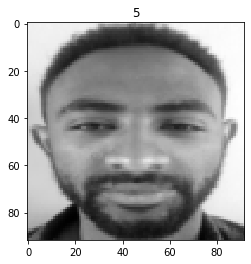

In [134]:
plt.imshow(A[:,56].reshape(92,92),cmap = 'gray')
plt.title(y_train[56])

In [113]:
# images = train_images.view(train_images.shape[0],-1).T
# images = images.numpy()
# image = images.T
# plt.imshow(image[1].reshape(92,92),cmap='gray')
# images.shape
mean_face = np.mean(A, axis=1)
# mean = np.expand_dims(mean_face, 1)
# mean_face.shape,image.shape,images.shape
# plt.imshow(mean_face.reshape(92,92),cmap='gray')
print(A.shape,mean_face.shape)

(8464, 121) (8464,)


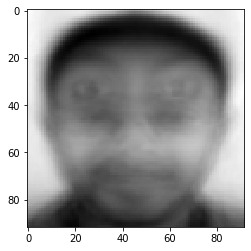

In [114]:
plt.imshow(mean_face.reshape(92,92),cmap='gray')

In [115]:

A_norm = np.subtract(A, np.expand_dims(mean_face,1))
# faces_norm_t = faces_norm.T
# # # faces_norm_t.shape
A_cov = np.cov(A_norm)
# face_cov.shape
A.shape,mean_face.shape,A_norm.shape,A_cov.shape

((8464, 121), (8464,), (8464, 121), (8464, 8464))

In [116]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(A_cov)
eigen_vecs.shape

(8464, 8464)

Text(0.5, 0.98, 'First 10 Eigenfaces')

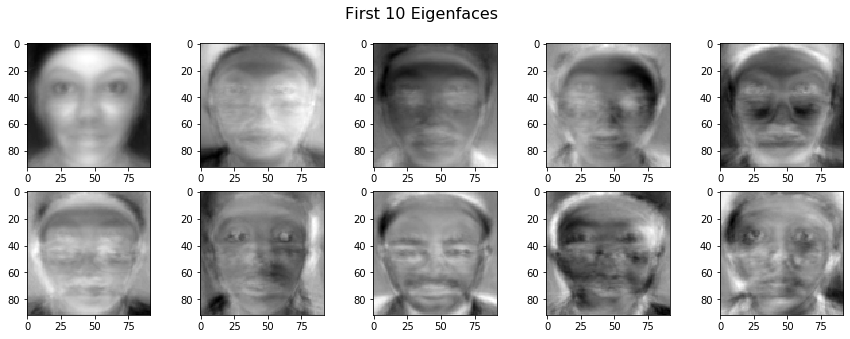

In [118]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(92,92)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

In [24]:
eigen_vecs[:,2]



array([-0.00452111, -0.00437693, -0.00405718, ...,  0.02784698,
        0.02753785,  0.02801183])

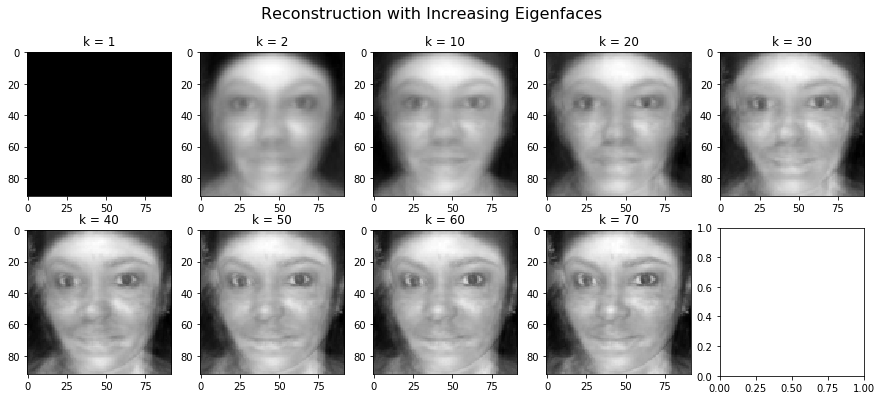

In [119]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,29,39,49,59,69],np.arange(9)):
    #reconstruct the 10th picture
    omega_k = eigen_vecs[:,:k].T.dot(A_norm[:,10])
    Reconstruction_k = eigen_vecs[:,:k].dot(omega_k) 
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
#     print(weights.shape)
    plt.imshow(Reconstruction_k.reshape(92,92),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);

In [120]:
idx = eigen_vals.argsort()[::-1]   
eigen_vals_sort = eigen_vals[idx]
eigen_vecs_sort = eigen_vecs[:,idx]

In [121]:
eigsum = np.sum(eigen_vals_sort);
csum = 0;
for i in range(0, len(labels)):
    csum = csum + eigen_vals_sort[i]
    tv = csum / eigsum
    if tv > 0.95:
        k = i
        break


In [122]:
k

48

Text(0.5, 1.0, 'variance vs Number of components')

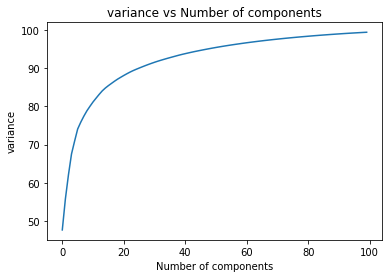

In [123]:
variance = []
no_comp =[]
for i in range(len(eigen_vals_sort)):
    variance.append((eigen_vals_sort[i]/sum(eigen_vals_sort))*100)
    no_comp.append(i)
     
eigcumsum = np.cumsum(variance);
# print(eigcumsum)

plt.plot(eigcumsum[:100])
plt.xlabel("Number of components")
plt.ylabel("variance")
plt.title("variance vs Number of components")

In [124]:
# print(eigvalues_sort[:k,:].shape)
reduced_eigen = eigen_vecs_sort[:,:k]
# reduced_eigen.T.shape,t_norm.shape

In [125]:
omega = np.dot(reduced_eigen.T,A_norm)
reduced_eigen.shape,A_norm.shape,omega.shape

((8464, 48), (8464, 121), (48, 121))

In [136]:
x_test.shape

(92, 92, 31)

(8464, 31)

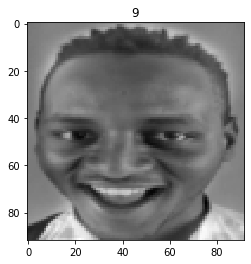

In [146]:
# label_test = "sileshi"
# img = im.open('Croped/sileshi/sileshi_wink.jpg').convert('L')
# t_img = img.resize((92,92), im.ANTIALIAS)
# t_img = np.array(x_test[5]).flatten() # vectorization
t_imgs = np.vstack(x_test)
t_norms = t_imgs - np.expand_dims(mean_face,axis=1)
# print(t_norm.shape)
plt.imshow(t_norms[:,5].reshape(92,92),cmap='gray')
plt.title(y_test[5])
t_norm.shape

In [149]:
omega_t= np.dot(reduced_eigen.T,t_norms)
omega_t.shape,omega.shape,reduced_eigen.shape

((48, 31), (48, 121), (8464, 48))

In [51]:
# omega_diff = []
# for i in range(omega.shape[1]):
#     for j in range(omega.shape[1]): 
#         omega_diff.append(omega[:,i]-omega[:,j])
        
# threshold = 0.5 * max(omega_diff)
# # threshold

In [143]:
y_test,len(y_test)

(array([ 4,  1, 14, 14, 11,  9,  8,  1,  0,  6,  2,  1,  1,  6, 12,  3,  6,
         0,  2, 13,  9, 13,  7,  2,  3,  1, 10,  1,  2, 12,  4]),
 31)

In [176]:
Class = ['aron','birhanu','dibora','eden','esayas','eyob','gebeyaw','henok','lubaba','merihun','shibre','sileshi','tesfaye1','tesfaye','tsedeniya','wube']
len(Class)

16

the accuracy is  87.09677419354838


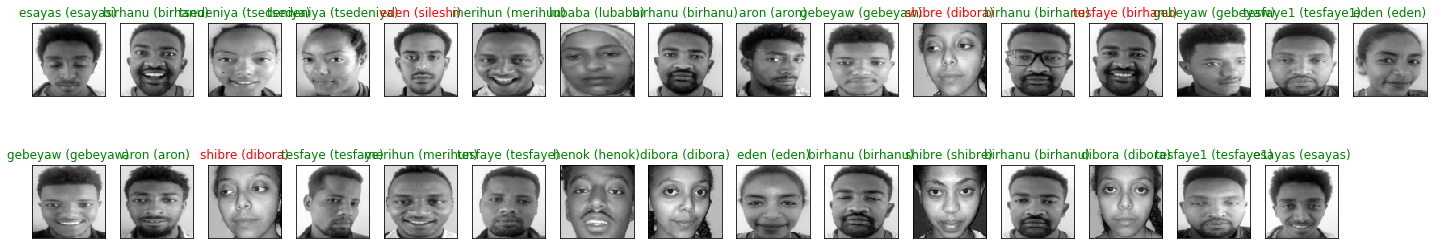

In [197]:
correct=0
fig = plt.figure(figsize=(25, 10))
for i in range(t_imgs.shape[1]) :
    err = (omega - np.expand_dims(omega_t[:,i],1)) ** 2
    # calculate the sum of square of error

    ssq1 = np.sum(err ** (1/2), axis=0)
#     print(ssq1.shape)
        # Find the closest face to the test image
    dist= ssq1.min(axis=0, keepdims=True)
    match=y_train[ssq1.argmin(axis=0)]
#     print(match,y_test[i])

    if y_test[i] == match:
        correct+=1
    ax = fig.add_subplot(4, t_imgs.shape[1]/2+1, i+1, xticks=[], yticks=[])
    img = t_imgs[:,i]
#     print(img.shape)
    plt.imshow(img.reshape(92,92),cmap='gray') 
    ax.set_title("{} ({})".format(Class[match], Class[y_test[i]]),
                 color=("green" if Class[match]==Class[y_test[i]] else "red"))

print("the accuracy is ",correct/omega_t.shape[1]*100)
        
        
# reconstructed_face = reduced_eigen.dot(omega_t)
# plt.imshow(reconstructed_face.reshape(92,92)+mean_face.reshape(92,92),cmap='gray')

In [ ]:

# for idx in np.arange(20):
    

In [ ]:
# #     # print the subject number
# if dist < 50000:
# else:
#     print ("subject face not match in database")
# print("The accuracy is %f percent" % (correct*100 / len(test_labels)))